### 목표
- 손글시 데이터를 분류하는 모델 만들기
- 이미지 데이터의 형태를 이해
- 예측의 불확실성 확인
- 다양한 분류평가지표를 이해

### 1.1 데이터 로딩

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv("./data/digit-recognizer/train.csv")
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
train.shape

(42000, 785)

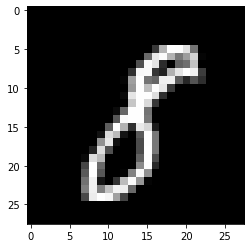

In [10]:
# 이미지 확인
# 이미지 한 장 자르기
img = train.iloc[5000, 1:]
# 이미지를 보여주는 함수
plt.imshow(img.values.reshape(28,28),
          cmap='gray') # 색상환(색상팔레트)변경 

In [5]:
train.iloc[10000, 0]

2

#### 모델링(교차검증 넣어서 가볍게 점수 확인)
- KNN
- Tree
- SGD(경사하강법 선형모델)
- LogisticRegression
- LinearSVM

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [12]:
test = pd.read_csv("./data/digit-recognizer/test.csv")
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
SGD_model = SGDClassifier()
logi_model = LogisticRegression()
svc_model = LinearSVC()

In [9]:
from sklearn.model_selection import cross_val_score

In [13]:
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

In [11]:
knn_score =cross_val_score(knn_model, X_train, y_train, cv=3)
tree_score =cross_val_score(tree_model, X_train, y_train, cv=3)
SGD_score =cross_val_score(SGD_model, X_train, y_train, cv=3)
logi_score =cross_val_score(logi_model, X_train, y_train, cv=3)
svc_score =cross_val_score(svc_model, X_train, y_train, cv=3)

C:\Users\aischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

In [12]:
print("knn score : ",knn_score.mean())
print("tree score : ",tree_score.mean())
print("SGD score : ",SGD_score.mean())
print("logi score : ",logi_score.mean())
print("svc score : ",svc_score.mean())

knn score :  0.9642142857142857
tree score :  0.8454761904761905
SGD score :  0.8766190476190476
logi score :  0.9128095238095238
svc score :  0.8613571428571429


In [13]:
# kaggle 사이트에 올려보기
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)
SGD_model.fit(X_train, y_train)
logi_model.fit(X_train, y_train)
svc_model.fit(X_train, y_train)

C:\Users\aischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aischool\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [14]:
knn_pre = knn_model.predict(test)
tree_pre = tree_model.predict(test)
SGD_pre = SGD_model.predict(test)
logi_pre = logi_model.predict(test)
svc_pre = svc_model.predict(test)

In [16]:
submission = pd.read_csv("./data/digit-recognizer/sample_submission.csv")
submission['Label']= knn_pre
submission.to_csv("./data/digit-recognizer/knn1.csv",
                 index=False)
submission['Label'] = tree_pre
submission.to_csv("./data/digit-recognizer/tree1.csv",
                 index=False)
submission['Label'] = SGD_pre
submission.to_csv("./data/digit-recognizer/SGD1.csv",
                 index=False)
submission['Label'] = logi_pre
submission.to_csv("./data/digit-recognizer/logi1.csv",
                 index=False)
submission['Label'] = svc_pre
submission.to_csv("./data/digit-recognizer/svc1.csv",
                 index=False)

#### 스케일링 적용하기
- 거리를 기반으로 하는 모델
- 경사하강법 모델 
- 스케일링을 적용해서 성능이나 연산 시간을 단축시킬 수 있다.

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
scaler = MinMaxScaler() # 스케일러 객체 생성
scaler.fit(X_train) # 기준값 찾기(최대값, 최소값)

MinMaxScaler()

In [13]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(test)

In [20]:
knn_model2 = KNeighborsClassifier()
tree_model2 = DecisionTreeClassifier()
SGD_model2 = SGDClassifier()
logi_model2 = LogisticRegression()
svc_model2 = LinearSVC()

In [21]:
# 스케일된 데이터로 학습해서 kaggle에 test데이더 업로드
knn_model2.fit(X_train_scaled, y_train)
tree_model2.fit(X_train_scaled, y_train)
SGD_model2.fit(X_train_scaled, y_train)
logi_model2.fit(X_train_scaled, y_train)
svc_model2.fit(X_train_scaled, y_train)

C:\Users\aischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aischool\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [22]:
knn_pre2 = knn_model2.predict(X_test_scaled)
tree_pre2 = tree_model2.predict(X_test_scaled)
SGD_pre2 = SGD_model2.predict(X_test_scaled)
logi_pre2 = logi_model2.predict(X_test_scaled)
svc_pre2 = svc_model2.predict(X_test_scaled)

In [23]:
submission = pd.read_csv("./data/digit-recognizer/sample_submission.csv")
submission['Label']= knn_pre2
submission.to_csv("./data/digit-recognizer/knn2.csv",
                 index=False)
submission['Label'] = tree_pre2
submission.to_csv("./data/digit-recognizer/tree2.csv",
                 index=False)
submission['Label'] = SGD_pre2
submission.to_csv("./data/digit-recognizer/SGD2.csv",
                 index=False)
submission['Label'] = logi_pre2
submission.to_csv("./data/digit-recognizer/logi2.csv",
                 index=False)
submission['Label'] = svc_pre2
submission.to_csv("./data/digit-recognizer/svc2.csv",
                 index=False)

#### 예측의 불확실성
- 분류 모델들은 항상 최종결과 이전에 확률을 계산

In [14]:
logi_model.predict(train.iloc[10000:10001,1:])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [15]:
logi_model.predict_proba(train.iloc[10000:10001,1:])

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### 분류평가지표

In [14]:
# 분류모델의 평가지표를 요약해서 보여주는 함수
from sklearn.metrics import classification_report

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state=1004)

In [16]:
logi_model3 = LogisticRegression()
logi_model3.fit(X_train,y_train)
pre = logi_model3.predict(X_val)

C:\Users\aischool\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(classification_report(pre,y_val))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1025
           1       0.98      0.96      0.97      1189
           2       0.91      0.91      0.91      1056
           3       0.88      0.89      0.89      1053
           4       0.93      0.92      0.93      1061
           5       0.85      0.88      0.86       931
           6       0.95      0.92      0.94      1055
           7       0.92      0.92      0.92      1065
           8       0.85      0.88      0.87       988
           9       0.89      0.87      0.88      1077

    accuracy                           0.91     10500
   macro avg       0.91      0.91      0.91     10500
weighted avg       0.91      0.91      0.91     10500



### 모델 저장하기(pickle)
- pickle : 파이썬 클래스를 직렬화해서 저장하기 좋게 만들어주는 도구

In [17]:
import pickle

In [18]:
# 모델저장
with open('./digit_model.pkl', 'wb') as f:
    pickle.dump(logi_model3, f)

In [19]:
# 모델로딩
with open('./digit_model.pkl', 'rb') as f:
    m= pickle.load(f)

In [ ]:
# 모델 저장할때 0b 인지 확인해야해용
# 0바이트면 모델 저장에 이상있는거니깐 다시 저장해야합니다.
# 지금 다시 저장해서 로딩도 완료 